# task 2 Transfer Learning from MNIST

In [268]:
import torch
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from  torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import PIL.Image as Image
import torchvision.models as models
import numpy as np

In [269]:
batch_size=64

datasets.MNIST.resources = [
    ('https://ossci-datasets.s3.amazonaws.com/mnist/train-images-idx3-ubyte.gz', 'f68b3c2dcbeaaa9fbdd348bbdeb94873'),
    ('https://ossci-datasets.s3.amazonaws.com/mnist/train-labels-idx1-ubyte.gz', 'd53e105ee54ea40749a09fcbcd1e9432'),
    ('https://ossci-datasets.s3.amazonaws.com/mnist/t10k-images-idx3-ubyte.gz', '9fb629c4189551a2d022fa330f9573f3'),
    ('https://ossci-datasets.s3.amazonaws.com/mnist/t10k-labels-idx1-ubyte.gz', 'ec29112dd5afa0611ce80d1b7f02629c')
]

trainset = datasets.MNIST(root='./', train=True,download=True, transform=transforms.Compose([transforms.ToTensor()]))
trainloader = DataLoader(trainset, batch_size=batch_size,shuffle=True, num_workers=2)

testset = datasets.MNIST(root='./', train=False, download=True, transform=transforms.ToTensor())
testloader = DataLoader(testset, batch_size=batch_size,shuffle=False, num_workers=2)
 

torch.Size([1, 28, 28])


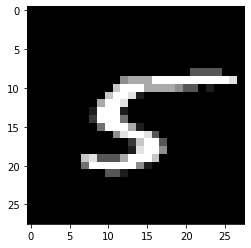

tensor(5)


In [270]:
def plot_digit(data):
    data = data.view(28, 28) #npimg = data.numpy() #img = transforms.ToPILImage(mode='L')(data)
    plt.imshow(data, cmap="gray")
    plt.show()

images, labels = next(iter(trainloader))
print(images[0].shape)
plot_digit(images[0])
print(labels[0])

In [271]:
class Net(nn.Module):

    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 10, 5)
        self.conv2 = nn.Conv2d(10, 20, 5)
        self.pool = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(320, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        #in_size = x.size(0)
        x =self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        #x = x.view(in_size, -1)  # flatten the tensor
        x = x.view(-1, 320)   
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)


In [272]:
net=Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [273]:
    
train_losses = []
val_losses = []
for epoch in range(20):  # loop over the dataset multiple time


    net.train()
    validation_loss=0.0
    running_loss = 0.0
    
    
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        
    print('[%d, %5d]training loss: %.3f' %
                  (epoch + 1, i + 1, running_loss /(i+1)))
    
    train_losses.append(running_loss/len(trainloader))
   # print(i+1,len(trainloader))
    running_loss = 0.0
 #validation

    net.eval()
    total = 0
    correct=0
    for i, data in enumerate(testloader, 0):
        inputs, labels = data
        outputs = net(inputs)
        
        loss = criterion(outputs , labels)
        validation_loss += loss.item()
    

    
    val_losses.append(validation_loss / len(testloader) )

    print('\n validationlLoss: {:.3f}'.format(validation_loss/ (i+1) ))
    
    validaton_loss=0.0

torch.save(net.state_dict(), './model_mnist.pth')
torch.save(optimizer.state_dict(), './optimizer_mnist.pth')
print('Finished Training')




[1,   938]training loss: 0.265

 validationlLoss: 0.074
[2,   938]training loss: 0.075

 validationlLoss: 0.056
[3,   938]training loss: 0.051

 validationlLoss: 0.046
[4,   938]training loss: 0.038

 validationlLoss: 0.037
[5,   938]training loss: 0.032

 validationlLoss: 0.034
[6,   938]training loss: 0.025

 validationlLoss: 0.032
[7,   938]training loss: 0.021

 validationlLoss: 0.035
[8,   938]training loss: 0.017

 validationlLoss: 0.034
[9,   938]training loss: 0.015

 validationlLoss: 0.032
[10,   938]training loss: 0.013

 validationlLoss: 0.047
[11,   938]training loss: 0.011

 validationlLoss: 0.031
[12,   938]training loss: 0.011

 validationlLoss: 0.038
[13,   938]training loss: 0.009

 validationlLoss: 0.042
[14,   938]training loss: 0.009

 validationlLoss: 0.038
[15,   938]training loss: 0.007

 validationlLoss: 0.037
[16,   938]training loss: 0.006

 validationlLoss: 0.042
[17,   938]training loss: 0.006

 validationlLoss: 0.043
[18,   938]training loss: 0.005

 valida

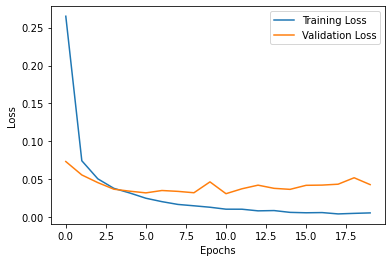

In [274]:
plt.plot(train_losses,label='Training Loss')  
plt.plot(val_losses,label='Validation Loss')  
plt.legend() 
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show() 

In [275]:
#accuracy on test data
#test
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 99 %


In [276]:
dir(datasets)

['CIFAR10',
 'CIFAR100',
 'Caltech101',
 'Caltech256',
 'CelebA',
 'Cityscapes',
 'CocoCaptions',
 'CocoDetection',
 'DatasetFolder',
 'EMNIST',
 'FakeData',
 'FashionMNIST',
 'Flickr30k',
 'Flickr8k',
 'HMDB51',
 'ImageFolder',
 'ImageNet',
 'KMNIST',
 'Kinetics400',
 'LSUN',
 'LSUNClass',
 'MNIST',
 'Omniglot',
 'PhotoTour',
 'Places365',
 'QMNIST',
 'SBDataset',
 'SBU',
 'SEMEION',
 'STL10',
 'SVHN',
 'UCF101',
 'USPS',
 'VOCDetection',
 'VOCSegmentation',
 'VisionDataset',
 'WIDERFace',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'caltech',
 'celeba',
 'cifar',
 'cityscapes',
 'coco',
 'fakedata',
 'flickr',
 'folder',
 'hmdb51',
 'imagenet',
 'kinetics',
 'lsun',
 'mnist',
 'omniglot',
 'phototour',
 'places365',
 'sbd',
 'sbu',
 'semeion',
 'stl10',
 'svhn',
 'ucf101',
 'usps',
 'utils',
 'video_utils',
 'vision',
 'voc',
 'widerface']

In [277]:
batch_size=64
 

transform=transforms.Compose([transforms.Grayscale(num_output_channels=1),
                              transforms.Resize(28),
                              
                              transforms.ToTensor()]
                           )
def svhn_loaders(batch_size): 
    train = datasets.SVHN("./data/shvn", split='train', download=True, transform=transform)
    test = datasets.SVHN("./data/shvn", split='test', download=True, transform=transform)
    train_loader = torch.utils.data.DataLoader(train, batch_size=batch_size, shuffle=True, pin_memory=True)
    test_loader = torch.utils.data.DataLoader(test, batch_size=batch_size, shuffle=False, pin_memory=True)
    return train_loader, test_loader

In [278]:
train_loader, test_loader=svhn_loaders(batch_size)

Using downloaded and verified file: ./data/shvn/train_32x32.mat
Using downloaded and verified file: ./data/shvn/test_32x32.mat


torch.Size([1, 28, 28])


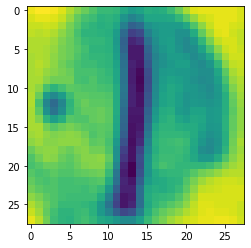

tensor([9, 8, 2, 2, 1, 3, 3, 3, 7, 0, 1, 5, 3, 6, 0, 5, 1, 3, 2, 1, 3, 6, 7, 4,
        2, 2, 8, 3, 0, 3, 3, 5, 3, 3, 9, 1, 2, 8, 6, 6, 5, 2, 2, 3, 2, 1, 2, 1,
        8, 7, 6, 3, 2, 0, 1, 2, 6, 8, 3, 4, 2, 6, 9, 2])


In [279]:
def imshow(img):
    """"this function take a tensor image, unormalize it then converted it numpy format"""
    #img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


    
images, labels = next(iter(train_loader))
print(images[10].shape)
imshow(images[10])
print(labels)

In [ ]:

model = Net()
model.load_state_dict(torch.load('./model_mnist.pth'))
#optimizer.load_state_dict(torch.load('./optimizer_mnist.pth'))#not working
model.eval()

In [280]:

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)   # optimize all cnn parameters
criterion = nn.CrossEntropyLoss()                       # the target label is not one-hotted

In [281]:
model.train()

for epoch in range(20):
    
    running_loss = 0.0
    
    
    for i, data in enumerate(train_loader,0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        
    print('[%d, %5d]training loss: %.3f' %
                  (epoch + 1, i + 1, running_loss /(i+1)))

[1,  1145]training loss: 0.753
[2,  1145]training loss: 0.476
[3,  1145]training loss: 0.407
[4,  1145]training loss: 0.368
[5,  1145]training loss: 0.338
[6,  1145]training loss: 0.314
[7,  1145]training loss: 0.294
[8,  1145]training loss: 0.280
[9,  1145]training loss: 0.265
[10,  1145]training loss: 0.250
[11,  1145]training loss: 0.239
[12,  1145]training loss: 0.230
[13,  1145]training loss: 0.219
[14,  1145]training loss: 0.209
[15,  1145]training loss: 0.201
[16,  1145]training loss: 0.194
[17,  1145]training loss: 0.186
[18,  1145]training loss: 0.180
[19,  1145]training loss: 0.173
[20,  1145]training loss: 0.166


In [282]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 88 %


Questions?
1-as far as I know, transfer learning means taking  a model trained on a large dataset and transfer its knowledge to a smaller dataset
why we transfer learning from MNIST to SVHN?
2-if we have flactuated validation error , what dhould I do?
